Hay muchos recursos para calcular la funcion de autocorrelacion ACF.

* Recursiva: Es mas facil y mas eficiente. 
* Analitica (forma cerrada) . Ventaja, puede calcular el termino 1000 (por ejemplo) sin necesitada de haber calculado los terminos 0 hasta 999.
* La que hicimos al comienzo del curso (les puse tarea: Pearson correlation coefficient)
* Usando **statsmodel**
* Usando NumPy . Como soy fanatico de NumPy esta la que vamos a suar de aca para adelante.

**bold text**### De la clase anterior


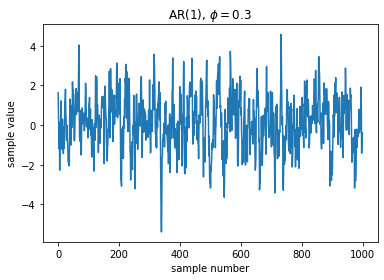

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ruido blanco Z
np.random.seed(1)  # por que ?
mu, sigma = 0, 1
N=1000
Z = np.random.normal(mu, sigma, N)

# parametros AR(1)
phi=0.7
X=np.zeros(N)
X[0]=Z[0]

for t in range(1,N):
    X[t] = Z[t] + phi*X[t-1]



# grafica
plt.xlabel("sample number")
plt.ylabel("sample value")
plt.title("AR(1), $\phi=0.3$")
plt.plot(X)
# plt.savefig("mi figura en pdf")
plt.show()



$X_t =  \phi^t X_0  + \sum_{i=0}^{\infty} \phi^i Z_{t-i} $

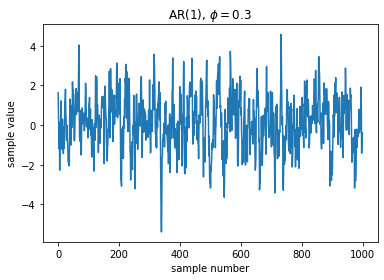

In [ ]:
## implementacion de la forma cerrada analitica. Closed form analytic.
X2 = np.zeros(N)
X2[0] = Z[0]

for t in range(1,N):
    X2[t] = phi**t*X2[0] + sum( phi**i  *Z[t-i] for i in range(t))

    # grafica
plt.xlabel("sample number")
plt.ylabel("sample value")
plt.title("AR(1), $\phi=0.3$")
plt.plot(X2)

# plt.savefig("mi figura en pdf")
plt.show()



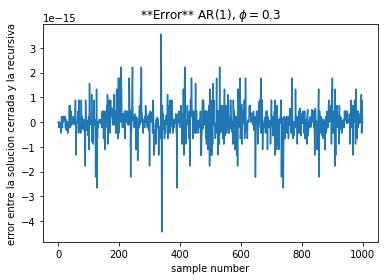

In [ ]:
plt.xlabel("sample number")
plt.ylabel("error entre la solucion cerrada y la recursiva")
plt.title("**Error** AR(1), $\phi=0.3$")

plt.plot(X-X2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


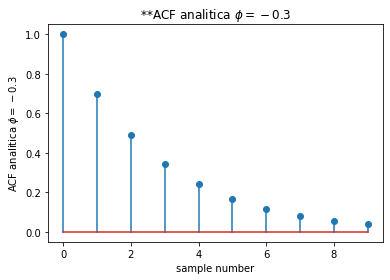

In [ ]:
# la ACF es funcion de el "lag" ("shift" , corrimiento, desplazamiento)
M=10
rho=np.zeros(M)
rho = [phi**i for i in range(M)]
plt.xlabel("sample number")
plt.ylabel("ACF analitica $\phi=-0.3$")
plt.title("**ACF analitica $\phi=-0.3$")

plt.stem(rho)
plt.show()


## Usando Statsmodel


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


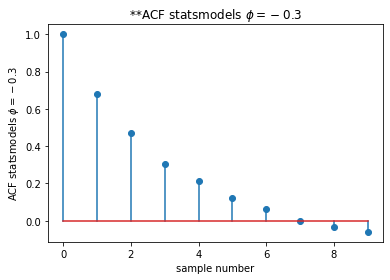

In [ ]:
import statsmodels.api as sm
rho2 = sm.tsa.acf(X)[0:10]

plt.xlabel("sample number")
plt.ylabel("ACF statsmodels $\phi=-0.3$")
plt.title("**ACF statsmodels $\phi=-0.3$")

plt.stem(rho2)
plt.show()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


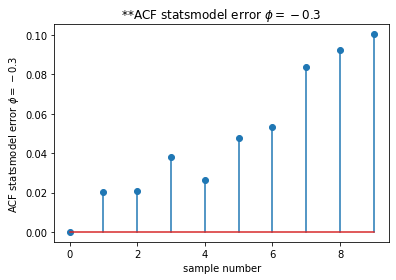

In [ ]:


plt.xlabel("sample number")
plt.ylabel("ACF statsmodel error $\phi=-0.3$")
plt.title("**ACF statsmodel error $\phi=-0.3$")

plt.stem(rho-rho2)
plt.show()


### Estimation of $\phi$ using the Yule walker equations $\phi=\rho[1]/\rho[0]$

In [ ]:
phi_1_estimado = rho[1]/rho[0]
print("phi estimado es ", phi_1_estimado)
print("rho_0=", rho[0])

phi estimado es  0.7
rho_0= 1.0


# AR(P)           P$>1$
 Cual es mi metodo? Ir de lo simple a lo complejo. 
 Entonces, en ese orden de ideas, asumimos P$=2$.

 La ecuacion
 $$ X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + Z_t + c $$
 A esto se le llama AR(2).
 Esto lo podemos escribir

 $$X_t = c + (\phi_1 B + \phi_2 B^2) X_t + Z_t $$
 de forma que

 $$(1 - \phi_1 B - \phi_2 B^2) X_t = c + Z_t  $$

$$X_{tp} = \frac{c+ Z_t}{1 - \phi_1 B - \phi_2 B^2} $$

Definimos el polinomio caracteristico 
$$p(B) = 1 - \phi_1 b - \phi_2 B^2 $$
Lo primero que debemos hacer es factorizar el polinomio caracteristico

$$ 1 - \phi_1 B - \phi_2 B^2 =(1 - \varphi_1 B)(1 - \varphi_2 B)   $$

Esto significa que tenemos dos raices

$$  r_1 = \frac{1}{\varphi_1} \quad r_2 = \frac{1}{\varphi_2}$$
De forma que tenemos

$$ (1 - B/r_1)(1 - B/r_2)  $$

La solucion particular tiene como coeficiente 

$$ \frac{1}{1 - \phi_1 B - \phi_2 B^2} = \frac{A_1}{1 - B/r_1} + \frac{A_2}{1 - B/r_2} $$

Usamos fracciones parciales:

$$ \frac{1}{1 - \phi_1 B - \phi_2 B^2} = \frac{A_1(1 - B/r_2) + A_2(1 - B/r_1)}{1 - \phi_1 B - \phi_2 B^2} $$

Equiparando coeficientes encontramos que

$$ 1 = A_1(1 - B/r_2) + A_2(1 - B/r_1)$$
(potencias iguales de $B: B^1, B^0$)

\begin{eqnarray}
1 &=& A_1 + A_2 \\
0 &=& -\frac{A_1}{r} - \frac{A_2}{r}
\end{eqnarray}

De la primera ecuacion 

$$ A_1 = 1 - A_2 \quad (1) $$
Insertamos esto en la segunda
$$0 = -\frac{1 - A_2}{r_2} - \frac{A_2}{r_1} =-\frac{1}{r_2} + \frac{A_2}{r_2} - \frac{A_2}{r_1} $$

Despejemos $A_2$

$$ A_2 = \frac{1/r_2}{1/r_2 - 1/r_1} = \frac{1}{r_2((r_1-r_2)/(r_1 r_2))}  = \frac{r_1}{r_1 - r_2 } $$

de (1)
$$A_1 = 1 - A_2 = 1 - \frac{r_1}{r_1-r_2} = \frac{r_1 - r_2 - r_1}{r_1 - r_2} = - \frac{r_2}{r_1 -r_2} $$

\begin{eqnarray}
\frac{1}{1 - \phi_1 B - \phi_2 B^2} &=& -\frac{r_2}{(r_1-r_2)(1 - B/r_2)} + \frac{r_1}{(r_1 - r_2) ( 1 - B/r_2)} \\
&=& \frac{1}{r_1 - r_2} \left [ \frac{r_1}{1 - B/r_2} - \frac{r_2}{1 - B/r_1}
\right ] \\
&=& \frac{1}{r_1 - r_2} \left [ r_1 \left ( 1 + (B/r_2) + (B/r_2)^2 + \cdots + (B/r_2)^n + \cdots 
\right )  \right . \\
&-&  \left .  r_2 \left ( 1 + (B/r_1) + (B/r_1)^2 + \cdots + (B/r_1)^n + \cdots 
\right )
\right ] \\
&=&  \frac{1}{r_1 - r_2}  \left [ (r_1 - r_2) + \left ( r_1 \frac{1}{r_2} - r_2 \frac{1}{r_1}
\right )B +  \left ( r_1 \frac{1}{r_2^2} - r_2 \frac{1}{r_1^2}
\right )B^2  \right . \\
&+&  \left .  \cdots + \left (  \left ( r_1 \frac{1}{r_2^n} - r_2 \frac{1}{r_1^n}
\right )B^n \right ) \cdots 
\right ]
\end{eqnarray}




Para que estas series geometricas converjan $|r_1 | > 1$,
$|r_2 | > 1$ . Seria interesante que tuvieramos un criterio para saber la convergencia basado solo en $\phi_1, \phi_2$.

El Apendice A de las notas de clase, 

$$ \phi_1 + \phi_2 < 1 \quad , \quad \phi_2 - \phi_1 < 1 \quad , \quad | \phi_2 | > 1$$
Estas son las condiciones para que la serie converja. 

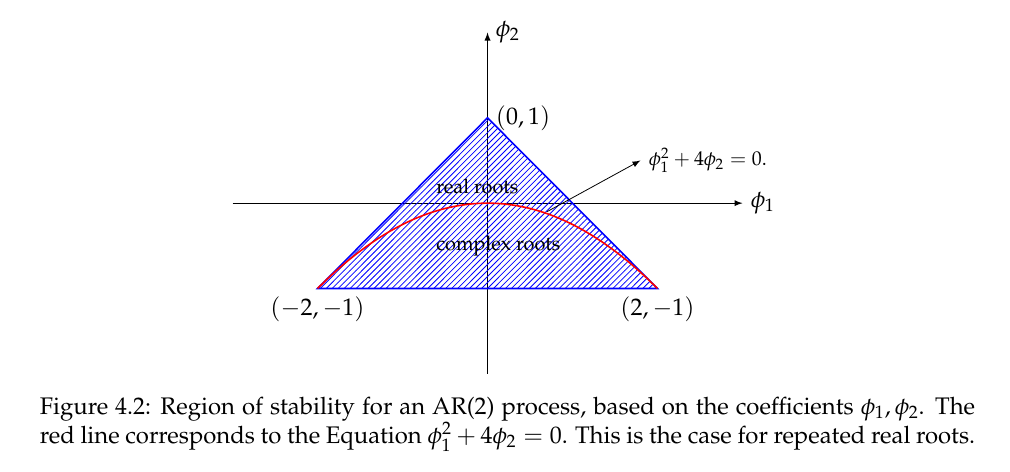

El triangulo del dibujo se llama Traingulo de Stralkowski.

\begin{eqnarray}
X_t &=& \frac{c + Z_t}{1 - \phi_1 B - \phi_2 B^2} \\
&=&   \frac{1}{r_1 - r_2}  \left [ (r_1 - r_2) + \left ( r_1 \frac{1}{r_2} - r_2 \frac{1}{r_1}
\right )B +  \left ( r_1 \frac{1}{r_2^2} - r_2 \frac{1}{r_1^2}
\right )B^2  \right . \\
&+&  \left .  \cdots + \left (  \left ( r_1 \frac{1}{r_2^n} - r_2 \frac{1}{r_1^n}
\right )B^n \right ) \cdots 
\right ]  (c + Z_t) \\
&=& \frac{1}{r_1 - r_2} \left [ (r_1 - r_2) Z_t  +  \left ( r_1 \frac{1}{r_2} - r_2 \frac{1}{r_1}
\right ) Z_{t-1}  +  \left ( r_1 \frac{1}{r_2^2} - r_2 \frac{1}{r_1^2}
\right ) Z_{t-2}  + \cdots +  \left ( r_1 \frac{1}{r_2} - r_2 \frac{1}{r_1}
\right )Z_{t-n} + \cdots 
\right ]
\end{eqnarray}


\begin{eqnarray}
X_0 &=& \frac{1}{r_1 - r_2} (r_1 - r_2) Z_0 = Z_0 \\
X_1 &=& \frac{1}{r_1 - r_2}  \left [ (r_1 - r_2) Z_1 + \left ( r_1 \frac{1}{r_2} - r_2 \frac{1}{r_1} 
\right ) Z_0 
\right ]  \\
&\vdots & \\
X_n &=& Z_n + \frac{1}{r_1 - r_2} \left [ \left ( r_1 \frac{1}{r_2} - r_2 \frac{1}{r_1}  \right ) Z_{n-1} \cdots \left ( r_1 \frac{1}{r_2^n} - r_2 \frac{1}{r_1^n}  \right ) Z_{0} 
\right ]
\end{eqnarray}

Que pasa si $r_1 = r_2$.

Entonces
$$1- \phi_1 B - \phi_2 B^2 = (1 - \varphi B)^2  $$

Etonces

\begin{eqnarray}
\frac{1}{1 - \phi_1 B - \phi_2 B^2} &=&
\left (   \frac{1}{1 - B/r}
    \right )^2 \\
    &=& (1 + B/r + (B/r)^2 + \cdots + (B/r)^n + \cdots )
\end{eqnarray}

De forma que

$$X_t = [  1 + B/r + (B/r)^2 + \cdots + (B/r)^n + \cdots]^2 Z_t$$

Truco: $w^2 = w w$

Se aplica el operador dentro de los brackets dos veces

\begin{eqnarray}
Y_t &=& [  1 + B/r + (B/r)^2 + \cdots + (B/r)^n + \cdots] Z_t \\
X_t &=&[  1 + B/r + (B/r)^2 + \cdots + (B/r)^n + \cdots] Z_t
\end{eqnarray}






\begin{eqnarray}
Y_t &=&  Z_t + Z_{t-1}/r + Z_{t-2}/r^2 + \cdots + Z_{t-n} /r^n  + \cdots  \\
X_t &=& Y_t + Y_{t-1}/r + Y_{t-2}/r^2 + \cdots +  Y_{t-n}/r^n  + \cdots
\end{eqnarray}

Como los computadores son causales lo que tenemos es:

\begin{eqnarray}
Y_0 &=& Z_0 \\
Y_1 &=& Z_1 + Z_0/r \\
&\vdots &\\
Y_n &=& Z_n + Z_{n-1} + \cdots + Z_0/r^n \\
X_0 &=& Y_0 \\
X_1 &=& Y_1 + Y_0 /r \\
&\vdots & \\
X_n &=& Y_n + Y_{n-1}/r + \cdots + Y_0/r_n
\end{eqnarray}

### Caso homogeneo $L u = 0$

$$ X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2}$$
No hay ruido ni hay $c$ 
Usando el backshift operator

$$ (1 - \phi_1 B - \phi_2 B^2) X_{th} = 0 $$
Recordando la factorizacion



$$p(B) X_{th} = (1 - \phi_1 B - \phi_2 B^2) X_{th} =
\left (1 - \frac{B}{r_1}  \right )\left ( 
   1 - \frac{B}{r_2} \right ) X_{th} = 0$$

   Si $ab=0$, entonces $a=0$ o $b=0$.

   Salen dos ecuaciones:


\begin{eqnarray}
(1 - B/r_1) X_{th} = 0 \\
(1 - B/r_2) X_{th} = 0
\end{eqnarray}
Ya el problema lineal se resolvio en la clase pasada  Y encontramos
que

\begin{eqnarray}
X_{th0} = C_0 \left (\frac{1}{r_1} \right )^t \\
X_{th1} = C_1 \left ( \frac{1}{r_2} \right )^t
\end{eqnarray}
La solucion del sistema homogeneo es la combinacion de estas dos

$$X_{th} =C_0 \left (\frac{1}{r_1} \right )^t +  C_1 \left ( \frac{1}{r_2} \right )^t $$

Se necesitan dos condiciones iniciales. $X_0=X_0,  X_1=X_1$


Para $t=0,1$

\begin{eqnarray}
X_0 &=& C_0 + C_1 \\
X_1 &=& \frac{C_0}{r_1} + \frac{C_1}{r_1}
\end{eqnarray}

Lo dejo como ejercio (esta en las notas)

\begin{eqnarray}
C_1 = \frac{r_1 ( X_0 - r_2 X_1) }{r_1 - r_2 } \quad , \quad 
C_2 = \frac{r_2 (r_1 X_1 - X_0)}{r_1 - r_2 }
\end{eqnarray}




